*Created by Petteri Nevavuori.*

---

# Deep Learning seminaari

Kirjana Goodfellow et al.: Deep Learning (2016)

Otsikot seuraavat pääotsikoiden tasolla kirjaa, mutta alaotsikot eivät aina.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#6.-Deep-Feedforward-Networks" data-toc-modified-id="6.-Deep-Feedforward-Networks-1">6. Deep Feedforward Networks</a></span><ul class="toc-item"><li><span><a href="#6.1.-Learning-XOR" data-toc-modified-id="6.1.-Learning-XOR-1.1">6.1. Learning XOR</a></span></li><li><span><a href="#6.2.-Gradient-Based-Learning" data-toc-modified-id="6.2.-Gradient-Based-Learning-1.2">6.2. Gradient-Based Learning</a></span><ul class="toc-item"><li><span><a href="#Output-Units" data-toc-modified-id="Output-Units-1.2.1">Output Units</a></span></li></ul></li><li><span><a href="#6.3.-Hidden-Units" data-toc-modified-id="6.3.-Hidden-Units-1.3">6.3. Hidden Units</a></span><ul class="toc-item"><li><span><a href="#Rectified-Linear-Unit" data-toc-modified-id="Rectified-Linear-Unit-1.3.1">Rectified Linear Unit</a></span></li><li><span><a href="#Logistic-Sigmoid-and-Hyperbolic-Tangent" data-toc-modified-id="Logistic-Sigmoid-and-Hyperbolic-Tangent-1.3.2">Logistic Sigmoid and Hyperbolic Tangent</a></span></li><li><span><a href="#Other-Hidden-Units" data-toc-modified-id="Other-Hidden-Units-1.3.3">Other Hidden Units</a></span></li></ul></li><li><span><a href="#6.4.-Architecture-Design" data-toc-modified-id="6.4.-Architecture-Design-1.4">6.4. Architecture Design</a></span><ul class="toc-item"><li><span><a href="#Universal-Approximation-Properties-and-Depth" data-toc-modified-id="Universal-Approximation-Properties-and-Depth-1.4.1">Universal Approximation Properties and Depth</a></span></li><li><span><a href="#Other-Architectural-Considerations" data-toc-modified-id="Other-Architectural-Considerations-1.4.2">Other Architectural Considerations</a></span></li></ul></li><li><span><a href="#6.5.-Back-Propagation-and-Other-Differentiation-Algorithms" data-toc-modified-id="6.5.-Back-Propagation-and-Other-Differentiation-Algorithms-1.5">6.5. Back-Propagation and Other Differentiation Algorithms</a></span><ul class="toc-item"><li><span><a href="#Recursively-Applying-the-Chain-Rule-to-Obtain-Backprop" data-toc-modified-id="Recursively-Applying-the-Chain-Rule-to-Obtain-Backprop-1.5.1">Recursively Applying the Chain Rule to Obtain Backprop</a></span></li><li><span><a href="#General-Backprop" data-toc-modified-id="General-Backprop-1.5.2">General Backprop</a></span></li><li><span><a href="#Differentiation-outside-the-Deep-Learning-Community" data-toc-modified-id="Differentiation-outside-the-Deep-Learning-Community-1.5.3">Differentiation outside the Deep Learning Community</a></span></li></ul></li><li><span><a href="#6.6-Historical-Notes" data-toc-modified-id="6.6-Historical-Notes-1.6">6.6 Historical Notes</a></span></li></ul></li></ul></div>

## 6. Deep Feedforward Networks

Syväoppivat menetelmät tarjoavat nykyisellään todella tehokkaita työkaluja ennen kaikkea ohjattuun oppimiseen. Syväoppivia menetelmiä voidaan hyöydyntää ennen kaikkea sellaisissa tehtävissä, jotka ihmiselle suoraviivaisia. Tällöin kuitenkin on oltava riittävästi valmiiksi [laajassa mielessä] luokiteltua dataa, jolla menetelmiä voidaan kouluttaa. Sellaiset tehtävät, jotka vaativat ihmiseltä enemmän pohdintaa, ovat toistaiseksi näiden menetelmien ulottumattomissa.

Perustavimman laatuiset myötäkytketyt neuroverkot (*feedforward neural networks*) tunnetaan nimellä monitasoiset perseptronit (*multilayer perceptron, MLP*). Myötäkytkennän tavoitteena on jonkin funktion approksimointi. Se voi ollaverkolle syötetyn datasetin generoineen datantuottoprosessin funktion approksimointia tai sitten vaikkapa syötteiden luokittelufunktion oppiminen. Kuten aiemmissakin koneoppimismenetelmissä, myötäkytketty verkko oppii funktion $y=f(x;\theta)$, jossa $\theta$ tarkoittaa mallin opittavia parametreja (painoja).

Myötäkytketyiksi verkkoja kutsutaan niiden sisäisen informaation kulkutavan vuoksi. Informaatio etenee suoraviivaisesti syötteestä verkon kerroksien läpi tuottaen lopulta ulostulon - takaisinkytkentöjä ei myötäkytketyissä verkoissa ole. Mikäli takaisinkytkentä löytyy, on kyse rekursiivisista neuroverkoista (*recurrent neural networks*), joskin nekin pohjaavat myötäkytkettyihin verkkoihin. Monet spesifimmät neuroverkot, kuten kuvantunnistuksessa käytetyt konvoluutioverkot (*convolutional neural networks*), rakentuvat myötäkytkennän ajatukselle.

Neuroverkkojen inspiraatio on aivojen neuroneissa ja synapseissa. Synapsit ovat painotettuja yhteyksiä neuronien, laskentayksiköiden tai porttien välillä. Samoin neuroverkot koostuvat kerroksiin järjestetyistä neuroneista, jotka yhdistyvät toisiinsa synapseilla, painoilla. Neuroverkkoihin liittyy seuraavia merkittäviä termejä:

 - **Neuroni** (*neuron*): Neuroverkon laskentayksikkö, joka muuntaa vektoreita skalaareiksi jonkun aktivointifunktion mukaisesti. Voidaan mieltää myös yhdeksi neuroverkon kytketyistä funktioista. Neuronin lisäksi näistä käytetään usein nimitytstä yksikkö. Neuroverkkojen graafiesityksissä solmut vastaavat neuroneita.

- **Aktivointifunktio** (*activation function*): Biologisten neuronien tapaan myös neuroverkkojen neuroneilla voi olla aktivointifunktioita. Mikäli sellaista ei ole, mallinnetaan syötedatasettiä lineaarisesti. Mikäli neuroneilla on aktivointifunktio, neuroniin syötteenä tuleva vektori muutetaan funktion mukaan. Neuvona on nykyisin käyttää piilokerroksissa oikaistua lineaarifunktiota (*rectified linear unit*). Aktivointifunktioita on useita.

- **Kerros** (*layer*): Neuroverkot muodostavat käytännössä funktioiden ketjuja. Funktiot sijaitsevat kukin omalla kerroksellaan, johon syöte tulee joko datana tai edellisestä kerroksesta. Perinteisesti kerrokset jaetaan syöttökerrokseen (*input layer*), piilokerrokseen/-siin (*hidden layer(s)*) ja ulostulokerrokseen (*output layer*).

- **Syvyys** (*depth*): Syvyys määräytyy kerroksien perusteella. Käytännössä syvyys määrittyy piilokerrosten mukaan.

- **Leveys** (*width*): Leveys määräytyy piilokerrosten neuronien määrällä. Mitä enemmän neuroneja kerroksissa on, sitä leveämmästä neuroverkosta on kyse.

Perinteisissä menetelmissä keinot vaikuttaa mallin funktioon tai funktioiden joukkoon rajoittuvat joko mahdollisimman geneeristen funktioiden käyttöön tai sitten käsipelillä funktion rakentamiseen. Syväoppivat menetelmät eroavat perinteisistä menetelmistä siten, että ne pyrkivät oppimaan omat funktionsa koulutuksen aikana. Tämän lisäksi niiden kohdalla on myös mahdollista vaikuttaa siihen, mitä ja miten opitaan.

### 6.1. Learning XOR

XOR-portti on perinteinen mallinnusongelma, jolla esitellään neuroverkkojen kyvykkyyttä perinteisten koneoppimismenetelmien rinnalla. XOR-portti ottaa vastaan kaksi syötettä ja aktivoituu vain (=1), mikäli jompi kumpi sisääntuloista on päällä (=1). Jos sisääntulot ovat samanarvoiset, joko pois päältä tai päällä, portti pysyy kiinni (=0). 

Lineaariset menetelmät kohtaavat ylitsepääsemättömiä ongelmia tämän ongelman ratkaisussa. Yksi lineaarinen funktio ei riitä mallintamaan tilannetta, jossa tarvitaan kaksi eri funktiota portin mallintamiseen. Yksinkertainen yhden piilokerroksen neuroverkko, jonka leveys on kaksi neuronia, riittää jo tämän ongelman kelvolliseen mallintamiseen.

### 6.2. Gradient-Based Learning

*Gradient descentin* eli jyrkimmän virheen laskun menetelmän käyttö on pääpiirteittäin aivan vaastaavaa perinteisiin menetelmiin verrattuna. Erona on lineaarisiin malleihin nähden, että epälineaarisuudestaan (*non-linearity*) johtuen neuroverkkojen koulutuksessa tavoitteena on mahdollisimman pieni virhe mahdollisen globaalin minimin sijasta. Tämä on suoraa seurasta epälineaarisuudesta. 

Gradientteja käytetään neuroverkkojenkin kohdalla kohdefunktion pienentämiseen. Neuroverkkojen kanssa käytettyjä kohdefunktioita löytyy useita ja ne ovat pääpiirteittäin samoja perinteisten menetelmien kanssa. Luokitteluongelmille löytyy omat kohdefunktiot, kuten myös klusterointi- ja regressio-ongelmille. Usein käytetty menetelmä on aiemmin esitelty logaritminen suurimman todennäköisyyden funktio (*maximum log-likelihood*), kun koulutettava malli pyrkii mallintamaan datasetin tuottanutta jakaumaa. kohdefunktioiden kanssa käytetään usein regularisointiparametria. 

Kohdefunktioista laskettujen neuronikohtaisten gradienttien tulee olla lukuina riittävän suuria ja ennustettavia. Mikäli gradientit jäävät pieniksi, kohdefunktiot kyllästyvät (*saturate*) eli tasaantuvat (*flatten*) eivätkä tarjoa enää riittävän suuria gradientteja verkon parametrien koulutukseen. kohdefunktioista negatiivinen logaritminen todennäköisyys (*negative log-likelihood*) auttaa tämän ongelman välttämisessä, kun se neuroverkon ulostuloneuronien funktioina käytetään exponentiaalisia funktioita (esim. sigmoid-funktioita).

Pelkkien parametrien oppimisen lisäksi neuroverkot voidaan valjastaa oppimaan toiminnallisia (*functional*) funktioita. Tällöin malli ei pyri tuottamaan tarkkoja datasetin tuottprosessin kuvauksia, vaan esimerkiksi keskiarvoja tietyissä rajoissa.

#### Output Units

Neuroverkkojen kohdalla kohdefunktion valinta on suoraan kytköksissä ulostulokerroksen neuronien tyyppeihin. Kuten piilokerroksienkin neuronien kohdalla, ulostulokerroksen neuronien tarkoituksena suorittaa muunnos (*transformation*) vektorisyötteestä luvuksi, joka on oppimistavoitteen kannalta käyttökelpoinen. Ulostulokerroksen neuronityypit voidaan karkeasti jakaa aktivointifunktioiden osalta seuraaviin yleisimmin käytettyihin tyyppeihin:

 - **Lineaariyksiköt**: Laskevat suoraan sisääntulovektorin arvon ilman mitään muunnoksia. Käyttökelpoinen todennäköisyysjakaumille.
 

 - **Sigmoid-yksiköt**: Käytetään binäärisen ulostulon laskentaan (Bernoullin jakauma). Sen sijaan, että tuotettaisiin vain kovia arvoja 0 tai 1, yksiköt tuottavat todennäköisyysarvoja välillä [0,1]. Näin vältetään 0-gradientin ongelma, jolloin funktio saturoituisi eikä koulutusta voitaisi verkolle tällöin tehdä. Toisaalta sigmoid-yksikötkin voivat saturoitua, mutta näissä tapauksissa verkko on saavuttanut jo "oikean vastauksen", eli yksikköön tuleva syöte on joko äärimmäisen negatiivinen ($\sigma \to 0$) tai positiivinen ($\sigma \to 1$).
 

 - **Softmax-yksiköt**: Laajennos sigmoid-yksiköstä binäärisen arvon sijasta *n* arvoon. Käytetään etenkin luokittelijoiden kanssa *n* luokan todennäköisyysjakauman kuvaamiseen. Yksikkö tuottaa normalisoidun vektorin (alkioiden summa on 1), josta negatiivisen logatrimisen todennäköisyyden avulla nostetaan esiin todennäköisin vektorin arvoista. Näin sekä koulutusta saadaan tehostettua. Ylipäätään softmax-yksikkö hyötyy eniten suurimman todennäköisyyden funktion käytöstä sisäisesti, sillä muiden menetelmien kanssa kyseiset yksiköt voisivat saturoitua väärässä kohdassa. Kuten sigmoid-yksiköt, softmax-yksikötkin voivat saturoitua vastaavaissa olosuhteissa.
 

Näiden lisäksi neuroverkot voivat sovittua melkein mihin tahansa ulostulokerroksen aktivointifunktioon. Mallin voidaan haluta esimerkiksi tuottavan yhtenä ulostulona $y$:n varianssia eri $x$:n näytteille, jolloin malli on nimeltään heteroskedastinen. Moniarvoregressiossa (*multimodal regressiossa*) yhdelle $x$:n näytteelle tahdotaan tuottaa useampi $y$:n arvo (esim. puheen generointi taajuuksien osalta), jolloin verkkoja nimitetään niiden ulostulon perusteella yhdistelmäjakaumaverkoiksi (*mixture density networks*). Näissä tapauksissa ollaan kuitenkin tekemisissä ehdollisten Gaussin jakaumien kanssa, jolloin gradientteihin pohjaavat optimointimenetelmät ovat osoittautuneet jokseenkin epävarmoiksi.

Joskaan kaikkia aktivointifunktioita ei ole mielekästä käytää piilokerroksissa, myös ulostulokerroksen aktivointifunktiot ovat kelvollisia piilokerroksen funktioita.

### 6.3. Hidden Units

Piilokerrosten suunnittelu on erittäin aktiivinen jatkuvan tutkimuksen osa-alue eikä siihen ole vielä olemassa kattavaa teoreettista säännöstöä. Perustuen kuitenkin kokeelliseen tutkimukseen, oikaistut lineaariyksiköt ovat erittäin pätevä perusvalinta piilokerrosten aktivointifunktioksi monenkirjavien vaihtoehtojen joukosta. Tätä alleviivataan. Joskin koneoppimisen osalta ja etenkin kohdefunktion minimoimisen osalta on ongelmallista, mikäli käytetyt funktiot eivät ole differentoitavissa, neuroverkkojen kohdalla tämä ei muodostu ongelmaksi: Neuroverkot eivät tavoittele kohdefunktion globaalia minimiä, vaan pelkkä merkittävä virheen pienentäminen on jo riittävää mallin sovittumiseksi.

#### Rectified Linear Unit

Oikaistun lineaariyksikön (*rectified linear unit, ReLU*) kaava on melko selkeä:

$$ g(z)  = \max{\{0,z\}} \text{, jossa z: edellisen kerroksen ulostulo.} $$

Mikäli yksikköön tuleva syöte $z$ on negatiivinen, se tuottaa arvon 0. Muussa tapauksessa yksikkö päästää syötteen sellaisenaan eteenpäin. Oikaistut lineaariyksiköt ovat nimensäkin mukaisesti hyvin läheisesti lineaariyksikköjä vastaavia, joskin negatiiviset arvot leikataan pois nollaan. Tällöin aktiivisina yksiköstä lasketut derivaatat ovat riittävän suuria ja johdonmukaisia gradienttien laskentaan. Ainoa selkeä ongelmakohta näiden yksiköiden kohdalla ovat sellaiset näytteet, jotka todellisuudessa ovat aktiivisia nollassa. 

Yksiköstä löytyy ainakin seuraavat muunnokset:

 - **Itseisarvoyksikkö** (*absolute value rectification*): Yksinkertaisuudessaan nollan sijasta negativiisista arvoista tuotetaan itseisarvo. TÄmä on käyttökelpoinen lähestymistapa esimerkiksi kohteentunnistuksessa.

 - **Vuotava oikaistu lineaariyksikkö** (*leaky ReLU*): Tiukan leikkauksen sijasta negatiiviset arvot vaimennetaan huomattavasti positiivisiin arvoihin nähden. Vaimennuskerroin on vakio.

 - **Oppiva oikaistu lineaariyksikkö** (*parametric ReLU, PReLU*): Muutoin sama, kuin vuotava lineaariyksikkö, mutta vaimennuskerroin on opittavissa.

 - **Maxout-yksikkö**: Edellisen kerroksen ulostulon $z$ alkiot ryhmitellään $k$ ryhmään, joista yksikkö valitsee jonkin ryhmän suurimman elementin.
 

Alla on vielä osa lineaariyksiköistä kuvattuna:

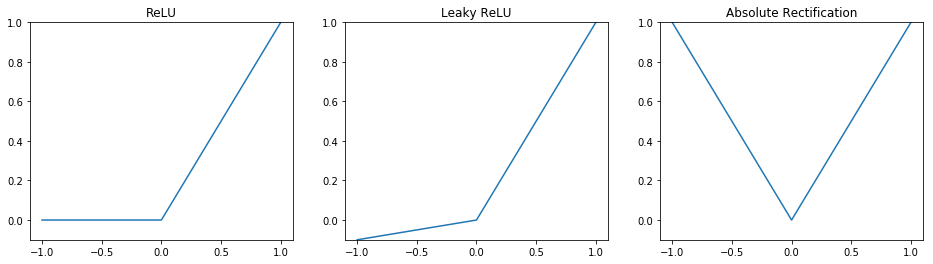

In [5]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = 16,4

titles = ['ReLU','Leaky ReLU','Absolute Rectification']
x = np.arange(-100,101)/100
fns = [[max(0,i) for i in x],np.concatenate((x[x<0]*0.1,x[x>=0])),np.absolute(x)]

for i in range(3):

    plt.subplot(131+i)
    plt.plot(x,fns[i])
    plt.title(titles[i])
    plt.ylim([-0.1,1])

plt.show()

Joka tapauksessa lineaaristen yksikköjen etuna on havainto, jonka mukaan neuroverkot näyttävät oppivat paremmin, kun niiden neuronien ulostulot ovat lähes lineaarisia.

#### Logistic Sigmoid and Hyperbolic Tangent

Ennen lineaarisia aktivointifunktioita käytetyimmät aktivointifunktiot olivat logistinen sigmoidaalifunktio $g(z) = \sigma (z)$ ja hyperbolinen tangenttifunktio $g(z) = \text{tanh}(z)$.

Sigmoidaalifunktiot tuottavat lukuja $[0,1]$ väliltä, kun taas tangenttifunktiot laajemmalta väliltä $[-1,1]$.

Sigmoidaalifunktio toimii parhaiten syötteen $z$ ollessa lähellä nollaa ja se saturoituu helposti äärimmäisillä syötteen arvoilla. Sigmoidaalifunktio saa arvon $0.5$ kohdassa $\sigma (0)$, kun taas $\text{tanh}(0)=0$. Hyperbolinen tangenttifunktio mallintaa dataa todenmukaisemmin. Tästä syystä hyperbolinen tangenttifunktio toimii sigmoidaalifunktioita paremmin samoissa käyttötilanteissa. Joka tapauksessa näiden funktioiden käytöstä piilokerroksessa ollaan siirrytty kohti ReLU-funktioita.

#### Other Hidden Units

Muitakin ei niin yleisesti käytettyjä piilokerroksen aktivointifunktioita kyllä löytyy, mutta niiden suorituskyky ei juurikaan poikkea yleisemmin käytetyistä. Niitä on monia, mutta joitakin listataan:

- **Lineaarinen aktivointifunktio**:Eli ei varsinaista aktivointifunktiotia lainkaan. Voidaan käyttää piirreavaruuden kaventamiseen.

- **Softmax**: Piilokerroksissa käytettynä ovat kelvollisia vain selkeästi erikoistuneemmissa verkoissa.

- **Radiaalifunktio** (*radial basis function, RBF*): Funktio aktivoituu, mitä lähempänä syöte on funktion keskipistettä. Laajentaa piirreavaruutta.

- **Softplus**: Pehmennetty oikaistu lineaarifunktio.

- **Lineaari-tanh** (*hard tanh*): Kuin ReLU, mutta muodostaa aktivointialueen tanh-funktion alueella $[-1,1]$.

### 6.4. Architecture Design

Aktivointifunktioiden lisäksi syväoppivien verkkojen arkkitehtuuri vaikuttaa merkittävästi opetettavan mallin kyvykkyytteen. Arkkitehtuurilla vastataan seuraaviin kysymyksiin:

 - Montako neuronia verkossa tulisi olla?
 - Miten neuronit yhdistyvät toisiinsa?

Verkot ovat perinteisesti yhdistetty toisiinsa kerrosten (*layer*) tasolla, tavallisesti ketjumaisesti. Yksi kerros muodostaa yhden opittavan funktion. Näissä verkoissa tärkeimmät suunnittelun painopisteet ovat verkon syvyydessä ja kerrosten leveydessä. Optimaalinen ratkaisu löydetään toistaiseksi vain kokeilemalla.

#### Universal Approximation Properties and Depth

Epälineaaristen ongelmien ratkaisu vaatii perinteisillä menetelmillä erikoistuneen mallintavien funktioiden suunnittelua. Näin ei kuitenkaan ole syväoppivien verkkojen kanssa, sillä myötäkytketyt piilokerroksia omaavat verkot toimivat ns. universaaleina funktioiden likiarvojen arvioijina tai ennustajina (*universal approximation*).

Tähän liittyvä teoreema (*universal approximation theorem*) sanoo, että riittävällä määrällä piiloneuroneja mikä tahansa myötkytketty verkko voi oppia funktion määrätystä syöteavaruudesta toiseen jollain nollaa suuremmalla virheen määrällä. Ainoa rajoite on, että opittavat funktion piirreavaruuden tulee olla jokin rajoitettu joukko *n*-piirteisessä avaruudessa, ts. $\mathbb{X} \subset \mathbb{R}$.

Käytännössä tämä tarkoittaa, että riittävän suurella verkolla voidaan oppia ainakin jossain määriin kuvaamaan hankalaakin epälineaarista johonkin datasettiin liittyvää funktiota. Kuvaamaan siksi, että takeita funktion oppimisesta eli virheettömästä kuvauksesta ei kuitenkaan ole. 

Teoreema ottaa enimmäkseen kantaa samoin vain yhden piilokerroksen eli matalaan (*shallow*) verkkoon ja keskustelee etenkin leveyden kasvattamisesta. Kun syvyyttä kasvatetaan, voidaan leveyttä pienentää, ja tällöin syvyydestä muodostuu merkittävin oppimiskykyyn vaikuttava tekijä.

Sovittuvuuden lisäksi syviä malleja voidaan hyödyntää tilastollisten syiden vuoksi. Syväoppivat menetelmät, kuten aiemminkin on jo todettu, oppivat kuvaamaan datasetin tuottoprosessia lähtökohtaisesti monen funktion yhdistelmänä. Empiiristen tutkimusten perusteella myös mallin syvyydellä näyttää olevan merkitystä mallien paremman sovittuvuuden kannalta.

#### Other Architectural Considerations

Keskustelun rajoittaminen vain syvyyteen ja leveyteen on mielekästä vain perinteisten myötäkytkettyjen ketjutettujen (*chained*) verkkojen kanssa. Käytännössä keskustelu arkkitehtuurista on neuroverkkojen kohdall kuitenkin laajempaa. Muuttamalla kerrosten välisiä kytkentätapoja voidaan saada aikaan huomattavan erikoistuneita verkkoja, kuten kuvantunnistuksen konvoluutioverkkoja (*convolutional networks*) tai rekursiivisia verkkoja (*recursive networks*). 

Kerrosten välillä voi esiintyä osittais- ja takaisinkytkentöjä. Osittaiskytkennöillä vain osa kerroksen neuroneista on kytketty johonkin toiseen osaan joko edeltävää tai seuraavaa kerrosta. Näin voidaan mallintaa esimerkiksi paikallisia funktioita tai piirrejoukkoja tai pienentää laskennallisia vaatimuksia. Takaisinkytkennässä kerroksen ulostulo syötetään myös verkkoon itseensä sisääntulona, jolloin esimerkiksi sekvenssien tai tilapäismuistin mallintaminen muodostuu käytännölliseksi mahdollisuudeksi. 

### 6.5. Back-Propagation and Other Differentiation Algorithms

Takaisinetenemisalgoritmi (*back-propagation algorithm*) tai tunnetummin *backprop* on algoritmi, joka on vastuussa gradienttien laskemisesta verkkojen koulutuksen toisessa vaiheessa. Koulutuksen ensimmäisessä vaiheessa syöte etenee kerrosten läpi aina ulostulokerrokseen asti, jossa lopuksi lasketaan valitulla virhefuntiolla verkon suorituskyky $P$. *Backprop* astuu kuvaan toisessa vaiheessa, kun syötteen pohjalta saatu mallin virhe on saatava oikeassa suhteessa laskettua kullekkin mallin parametrille $\theta_i$ eli painolle.

Backprop ei kuitenkaan vielä opeta mallia, vaan laskee vasta opetukseen tarvittavan gradientin. Esimerkiksi stokastisella jyrkimmän laskun menetelmällä (*stochastic gradient descent*) saadaan sitten laskettua parametrien muutossuunta. Backprop ei myöskään ole vain perinteisten MLP-verkkoihin gradienttin laskenta-algoritmi, vaan sillä voidaan laskea lähes funktiosta kuin funktiosta.

Backprop hyödyntää differentiaalilaskennan ketjusääntöä, jolla voidaan derivoida yhdistettyjä funktioita ja täten laskea osittaisderivaatat. Osittaisderivaatasta sanotaan Wikipediasssa seuraavaa:

> Osittaisderivaatalla voidaan tutkia, mikä vaikutus yhden muuttujan muutoksella on funktion arvoon varioitavan muuttujan arvon ympäristössä. (*[Wikipedia: Osittaisderivaatta](https://fi.wikipedia.org/wiki/Osittaisderivaatta)*)

Toisin sanoen osittaisderivaatoilla voidaan syväoppimiseen liittyen laskea mallin painojen osuus mallin kokonaisvirheestä.

Olkoot $y=g(x)$ ja $z = f(y)$. Derivoinnin ketjusääntöä hyödyntäen osittaisderivaatta muuttujan $x$ suhteen on kaavana

$$\frac{dz}{dx}=\frac{dz}{dy}\frac{dy}{dx}.$$

Kielellisesti ilmaistuna muuttujan $z$ osaderivaatta muuttujan $x$ suhteen saadaan muuttuja $z$ muuttujan $y$ suhteen ja muuttuja $y$ muuttujan $x$ suhteen laskettujen osaderivaattojen tulona.

Tämä on yleistettävissä myös vektoreihin, jolloin päästään mallien parametrivektoreihin ja virheen osaderivaattojen laskentaan suhteessa kuhunkin parametriin (Jakobin matriisi). Tällöin jokaisen parametrin osaderivaatan laskukaava on

$$\frac{\delta z}{\delta x_i}=\sum_j \frac{\delta z}{\delta y_j}\frac{\delta y_j}{\delta x_i}.$$

Tällöin jokaisen vektorin osaderivaatta jokaisen vektorin $x$ alkion suhteen lasketaan kunkin vektorin $y$ alkion osalta. 

#### Recursively Applying the Chain Rule to Obtain Backprop

Mikäli backprop-algoritmi otettaisiin käyttöön vain sellaisenaan verkossa, jossa osittaisderivaatat laskettaisiin monen kerroksen ja neuronin kohdalla, tulisi samoja laskuja suoritettua useasti ja implementaatio olisi tällöin tehoton. Esimerkiksi kahdella piilokerroksella ensimmäisen kerroksen painojen virheen osittaisderivaattojen laskenta vaatisi toisen kerroksen neuronien kohdalla tapahtuvan virheen osittaisderivaattojen laskennan jälkimmäisen kerroksen jokaisen neuronin kohdalla *ja* kutakin ensimmäisen kerroksen neuronia varten.

Ratkaisu tähän laskujen moninkertaistukseen on ottaa käyttöön mallien parametreille eli painoille vektorien sijasta tensorit. Tensoreiden käyttö mahdollistaa painojen skalaariarvoja sisältävän vektorin yhdistämisen vektoriin, jossa on talletettuna painokohtaisesti lasketut gradientit eli osittaisderivaatat. Näin ne tarvitsee laskea vain kerran, eikä kallista moneen kertaan tapahtuvaa laskentaa ole pakko suorittaa.

#### General Backprop

Itse algoritmi on yksinkertainen. Selvitettäessä gradienttia eli osittaisderivaattaa jollekin skalaarille $z$ (esim. mallin ulostuloarvo) suhteessa syötteeseen $x$ lasketaan gradientit kullekin $z$ ja $x$ välissä olevalle parametrille. Gradientit lasketaan taso kerraallaan, edeten aina ulostuloarvosta $z$ sitä edeltäneisiin kerroksiin ja näiden kerroksien neuronien painoihin. Neuronikohtaiset gradientit lasketaan summaamalla kaikki $z$ suunnasta lasketut gradientit yhteen.

Kuten koneoppimismenetelmien kehityksessä ja käytössä yleensä, myös backpropin käytössä on huomioitava siihen lähtökohtaisesti vain toiminta- ja kehitysympäristön kautta liittyviä asioita - pääsääntöisesti nämä asiat ovat ohjelmointiin liittyviä virheen- ja tyyppikäsittelyn asioita. Itse algoritmi on kuitenkin jo kehitetty vastaamaan naiivin gradientin laskennan korkeaa laskentahintaa (*computational cost*) helpottamaan.

#### Differentiation outside the Deep Learning Community

Esitelty ja syväoppimisyhteisössä laajalti käytetty backprop on kuitenkin vain yksi derivaattojen laskenta- eli differointimenetelmä muiden joukossa. Automaattisen differoinnin tutkimuskenttä keskittyy etenkin tähän alueeseen. Backprop on vain osa laajempaa käänteisen moodin kerääntymisen (*revese mode accumulation*) algoritmien perhettä. Kulmakertoimen lisäksi differointia voidaan tehdä myös korkeammissa differointiulottuvuuksissa (esim. toisen asteen derivaatat) tai -järjestyksissä. Optimaalisen gradientinlaskennan ongelma on NP-täydellinen, eli sen laskenta on erittäin haastava ja lähes mahdoton ratkaista. 

Huomionarvoista on kuitenkin se, että koska kirjan kirjoittavat ovat ilmeisen aktiivisesti tekemisissä TensorFlow-kirjaston kanssa, heidän kommenttejaan bakcpropin eksplisiittisestä koodauksesta varjostaa ennen kaikkea TensorFlowin toteutus ja käyttötapa. Esimerkiksi PyTorchin kanssa optimointi on yksi sellaisenaan käytettävä osa kirjastoa ja siinä on valmiina sellaisenaan käyttökelpoiset toteutukset muutamalle käytetyimmistä optimointi-implementaatiosta.

### 6.6 Historical Notes

Modernit syväoppivat verkot nojaavat vahvasti jo monta sataa vuotta sitten kehitettyihin matemaattisiin ajatuksiin. Backpropin pohjana toimiva differentiaalilaskennan ketjusääntö on kehitetty jo 1600-luvulla. Matemaattista optimointia on myös tehty jo satoja vuosia sitten, mutta *gradient descent* on sekin jo 1800-luvulla kehitetty. Funktioiden approksimaatiomenetelmiä on kehitetty aktiivisesti aina 1940-luvulta, jolloin myös perinteisten monikerroksisten neuroverkkojen esiaste, perseptroni, on kehitetty. Dynaamisen ohjelmoinnin myötä 1960- ja 1970-luvuilla ketjusäännön tehokasta laskentaa alettiin tutkia laajemmmin ja jo 1980-luvulla kehitettyjä menetelmiä ehdotettiinkin neuroverkkojen kanssa käytettäviksi. Kyseisen vuosikymmenen puolivälissä backprop sai julkisuutta ja sitä alettiin hyödyntää laajemmin koneoppimisongelmissa.

Ensimmäinen hypekäyrän huippu saavutettiin jo 1990-luvun alussa, kunnes suvantovaiheen jälkeen toinen huippu koettiin vuonna 2006. Myötäkytkettyjen verkkojen perustana toimivat ajatukset neuroneja sisältävien kerrosten yhdistämisestä eivät kuitenkaan ole merkittävissä määrin enää muuttuneet 1980-luvun jälkeen. Verkkojen suorituskyvyn kehitys onkin purettavissa kahteen päätekijään: datasettien koon kasvun myötä helpottuneeseen tarkempien mallien koulutukseen ja laskentatehon kasvun myötä koossa ja tehossa kasvaneisiin verkkoihin.

Pienempiä, mutta kuitenkin merkittäviä, muutoksia ovat olleet optimointialgoritmien tutkimus ja kehitys. Siirtyminen keskimääräisestä neliövirheestä ristientropian (esim. MLE) menetelmiin 1990-luvulla vaikutti suorituskyvyn kehittymiseen huomattavasti. Myös jo käsitely sigmoidaalifunktioiden korvaaminen lineaarifunktioilla piilokerroksissa edesautti tätä kehitystä edelleen. Vuodesta 2012 alkaen syväoppivia verkkoja on pidetty itsenäisesti varteenotettavina koneoppimisen ja optimoinnin menetelminä.